<a href="https://colab.research.google.com/github/grod6259/HFDataAnalytics2023-2024/blob/main/python_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#import data to files in colab and copy path
#load packages
import pandas as pd

In [45]:
import matplotlib.pyplot as plt

In [46]:
import seaborn as sns

In [47]:
#load the data
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date__20240508.csv')

In [48]:
#find out how big the dataset is
df.shape

(63621, 19)

In [49]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63621 entries, 0 to 63620
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                63621 non-null  int64  
 1   ARREST_DATE               63621 non-null  object 
 2   PD_CD                     63619 non-null  float64
 3   PD_DESC                   63621 non-null  object 
 4   KY_CD                     63612 non-null  float64
 5   OFNS_DESC                 63621 non-null  object 
 6   LAW_CODE                  63621 non-null  object 
 7   LAW_CAT_CD                63219 non-null  object 
 8   ARREST_BORO               63621 non-null  object 
 9   ARREST_PRECINCT           63621 non-null  int64  
 10  JURISDICTION_CODE         63621 non-null  int64  
 11  AGE_GROUP                 63621 non-null  object 
 12  PERP_SEX                  63621 non-null  object 
 13  PERP_RACE                 63621 non-null  object 
 14  X_COOR

In [50]:
#find out information regarding categories in the data set
categories=df.dtypes[df.dtypes =="object"].index

In [51]:
print (categories)

Index(['ARREST_DATE', 'PD_DESC', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD',
       'ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'New Georeferenced Column'],
      dtype='object')


In [52]:
#Check data information
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)


In [53]:
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
63616,282877412,02/27/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,60,0,45-64,M,WHITE HISPANIC,987154,149165,40.576100,-73.989545,POINT (-73.989545 40.5761)
63617,283628088,03/12/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,M,13,0,45-64,M,BLACK,985689,208933,40.740151,-73.994805,POINT (-73.994805 40.740151)
63618,283387006,03/07/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,F,K,73,0,25-44,M,BLACK,1008227,183789,40.671104,-73.913562,POINT (-73.913562 40.671104)
63619,283013910,03/01/2024,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110A4,M,K,83,0,25-44,F,BLACK,1007120,193913,40.698894,-73.917522,POINT (-73.91752179908735 40.698893568968515)
63620,283495531,03/10/2024,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M,S,123,0,25-44,M,WHITE,930842,133050,40.531707,-74.192126,POINT (-74.192126 40.531707)


In [54]:
#check statistics on data
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,6.362100e+04,63619.000000,63612.000000,63621.000000,63621.000000,6.362100e+04,63621.000000,63621.000000,63621.000000
mean,2.822203e+08,440.414687,254.941002,63.337279,0.946731,1.005320e+06,207682.477515,40.735404,-73.921505
std,1.387821e+06,274.537356,150.296448,35.192684,7.187989,2.219886e+04,29489.571873,0.242299,0.421644
min,2.797635e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.252711
25%,2.810329e+08,139.000000,113.000000,40.000000,0.000000,9.905030e+05,185710.000000,40.676347,-73.977428
50%,2.822323e+08,419.000000,341.000000,63.000000,0.000000,1.005040e+06,206851.000000,40.734434,-73.924895
75%,2.834321e+08,705.000000,344.000000,101.000000,0.000000,1.017689e+06,235265.000000,40.812415,-73.879171
max,2.846252e+08,973.000000,995.000000,123.000000,97.000000,1.067185e+06,271282.000000,40.911236,0.000000


In [55]:
#check for missing values
print(df.isnull().sum())

ARREST_KEY                    0
ARREST_DATE                   0
PD_CD                         2
PD_DESC                       0
KY_CD                         9
OFNS_DESC                     0
LAW_CODE                      0
LAW_CAT_CD                  402
ARREST_BORO                   0
ARREST_PRECINCT               0
JURISDICTION_CODE             0
AGE_GROUP                     0
PERP_SEX                      0
PERP_RACE                     0
X_COORD_CD                    0
Y_COORD_CD                    0
Latitude                      0
Longitude                     0
New Georeferenced Column      0
dtype: int64


In [56]:
#remove missing values
df.dropna()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63616,282877412,02/27/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,60,0,45-64,M,WHITE HISPANIC,987154,149165,40.576100,-73.989545,POINT (-73.989545 40.5761)
63617,283628088,03/12/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,M,13,0,45-64,M,BLACK,985689,208933,40.740151,-73.994805,POINT (-73.994805 40.740151)
63618,283387006,03/07/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,F,K,73,0,25-44,M,BLACK,1008227,183789,40.671104,-73.913562,POINT (-73.913562 40.671104)
63619,283013910,03/01/2024,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110A4,M,K,83,0,25-44,F,BLACK,1007120,193913,40.698894,-73.917522,POINT (-73.91752179908735 40.698893568968515)


In [ ]:
#pick out Bronx as initial comparison point, filter data
df[df['ARREST_BORO']=='B']

In [18]:
#save the data in the filtered dataframe
my_df=df[df['ARREST_BORO']=='B']

In [19]:
#check to see if it worked
my_df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
9,281426006,01/31/2024,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,B,41,0,18-24,M,BLACK,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)
16,282248602,02/15/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,47,0,18-24,M,BLACK,1021554,261934,40.885545,-73.865086,POINT (-73.865086 40.885545)
22,283166738,03/04/2024,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,B,45,0,18-24,M,WHITE HISPANIC,1032091,241976,40.830722,-73.827126,POINT (-73.8271260588639 40.8307223277672)
31,281488926,02/01/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,B,41,0,25-44,M,BLACK,1014999,237381,40.818180,-73.888908,POINT (-73.888908 40.81818)


In [20]:
#continue to filter data: pick feature to compare: find out which crime is commited most often and by who in the Bronx
my_df.drop(columns=['ARREST_KEY', 'PD_CD', 'KY_CD','ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column' ])

,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CODE,LAW_CAT_CD,AGE_GROUP,PERP_SEX,PERP_RACE
3,01/19/2024,"CONTROLLED SUBSTANCE, POSSESSI",DANGEROUS DRUGS,PL 2200300,M,45-64,M,BLACK
9,01/31/2024,RAPE 2,RAPE,PL 1303001,F,18-24,M,BLACK
16,02/15/2024,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,18-24,M,BLACK
22,03/04/2024,RAPE 3,RAPE,PL 1302503,F,18-24,M,WHITE HISPANIC
31,02/01/2024,"LARCENY,PETIT FROM OPEN AREAS,",PETIT LARCENY,PL 1552500,M,25-44,M,BLACK
...,...,...,...,...,...,...,...,...
63570,03/19/2024,AGGRAVATED HARASSMENT 2,OFF. AGNST PUB ORD SENSBLTY &,PL 240301A,M,25-44,M,WHITE HISPANIC
63589,03/13/2024,AGGRAVATED GRAND LARCENY OF ATM,GRAND LARCENY,PL 1553502,F,45-64,M,BLACK
63603,03/11/2024,"FORGERY,ETC.-MISD.",OFFENSES INVOLVING FRAUD,PL 1700500,M,25-44,M,BLACK
63606,03/14/2024,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,PL 1600500,F,45-64,M,BLACK


In [21]:
#which offense is commited the most in the Bronx
my_df.groupby('OFNS_DESC').size()

OFNS_DESC
(null)                                     2
ADMINISTRATIVE CODE                        2
AGRICULTURE & MRKTS LAW-UNCLASSIFIED       4
ALCOHOLIC BEVERAGE CONTROL LAW             9
ARSON                                     12
ASSAULT 3 & RELATED OFFENSES            2300
BURGLAR'S TOOLS                           15
BURGLARY                                 384
CANNABIS RELATED OFFENSES                 26
CHILD ABANDONMENT/NON SUPPORT              4
CRIMINAL MISCHIEF & RELATED OF           625
CRIMINAL TRESPASS                        124
DANGEROUS DRUGS                          945
DANGEROUS WEAPONS                        586
DISORDERLY CONDUCT                         1
ENDAN WELFARE INCOMP                      10
ESCAPE 3                                   1
FELONY ASSAULT                          1371
FOR OTHER AUTHORITIES                     96
FORGERY                                  149
FRAUDS                                    58
FRAUDULENT ACCOSTING                       2


In [22]:
#the highest offense in the Bronx is number of assult 3 & related offenses, comparing to main dataframe
assault_count = df[df['OFNS_DESC'] == 'ASSAULT 3 & RELATED OFFENSES'].shape[0]
print(f"Number of ASSAULT 3 & RELATED OFFENSES: {assault_count}")

Number of ASSAULT 3 & RELATED OFFENSES: 8960


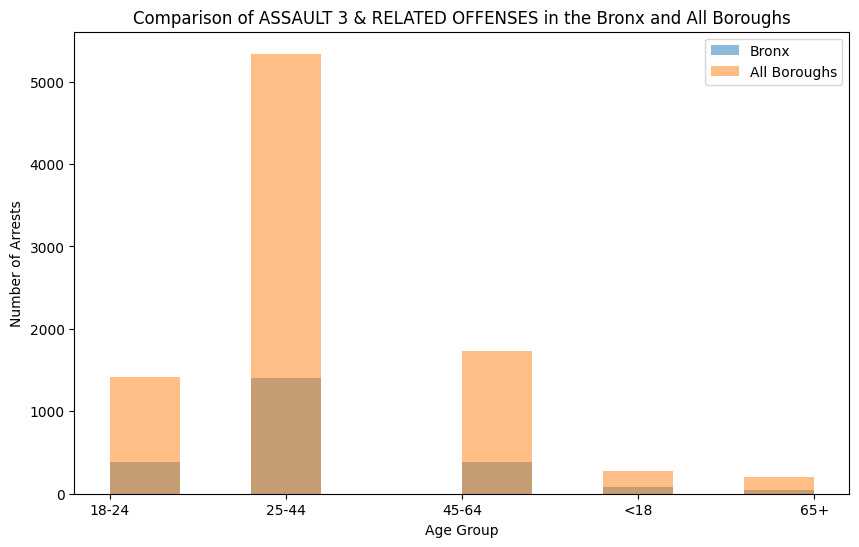

In [23]:
my_df_assault = my_df[my_df['OFNS_DESC'] == 'ASSAULT 3 & RELATED OFFENSES']
df_assault = df[df['OFNS_DESC'] == 'ASSAULT 3 & RELATED OFFENSES']

# Create histograms for both dataframes
plt.figure(figsize=(10, 6))
plt.hist(my_df_assault['AGE_GROUP'], alpha=0.5, label='Bronx')
plt.hist(df_assault['AGE_GROUP'], alpha=0.5, label='All Boroughs')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Arrests')
plt.title('Comparison of ASSAULT 3 & RELATED OFFENSES in the Bronx and All Boroughs')

# Add legend and show plot
plt.legend()
plt.show()

In [24]:
#which offense level happens most in the Bronx
my_df.groupby('LAW_CAT_CD').size()

LAW_CAT_CD
9       2
F    5728
I       6
M    8320
V      69
dtype: int64

In [25]:
#the highest offense level is M, comparing to main data frame
offense_level = df[df['LAW_CAT_CD'] == 'M'].shape[0]
print(f"M: {offense_level}")

M: 35580


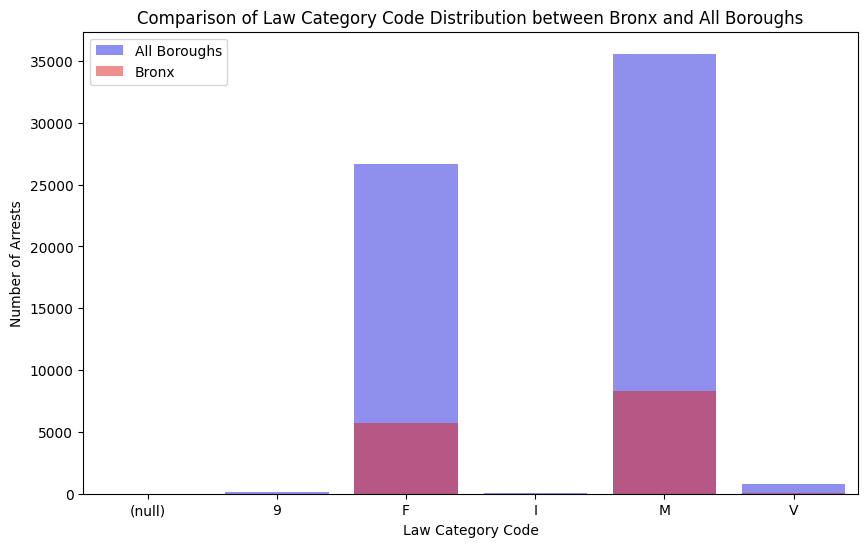

In [26]:
# Compare the distribution of law_cat_cd between my_df and df
df_grouped = df.groupby('LAW_CAT_CD').size().reset_index(name='count')
my_df_grouped = my_df.groupby('LAW_CAT_CD').size().reset_index(name='count')

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='LAW_CAT_CD', y='count', data=df_grouped, color='blue', label='All Boroughs', alpha=0.5)
sns.barplot(x='LAW_CAT_CD', y='count', data=my_df_grouped, color='red', label='Bronx', alpha=0.5)

# Add labels and title
ax.set_xlabel('Law Category Code')
ax.set_ylabel('Number of Arrests')
ax.set_title('Comparison of Law Category Code Distribution between Bronx and All Boroughs')

# Add legend and show plot
ax.legend()
plt.show()

In [27]:
#which age group is being arrested the most in the Bronx
my_df.groupby('AGE_GROUP').size()

AGE_GROUP
18-24    2629
25-44    8416
45-64    2477
65+       184
<18       515
dtype: int64

In [28]:
#the age group being arrested the most is 25-44, comapring to main data frame
age_group = df[df['AGE_GROUP'] == '25-44'].shape[0]
print(f"25-44: {age_group}")

25-44: 37254


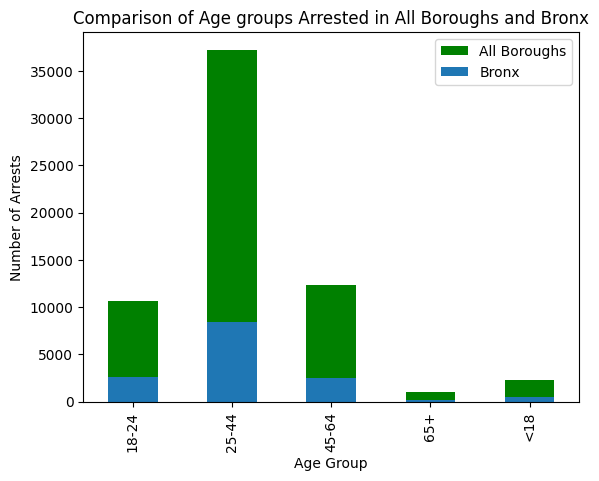

In [29]:
#compare age_group in both dataframes
df_age = df.groupby('AGE_GROUP').size()
my_df_age = my_df.groupby('AGE_GROUP').size()

# Create a bar chart to compare the age_group in both dataframes
df_age.plot(kind='bar', label='All Boroughs', color='green')
my_df_age.plot(kind='bar', label='Bronx')
plt.title('Comparison of Age groups Arrested in All Boroughs and Bronx')
plt.xlabel('Age Group')
plt.ylabel('Number of Arrests')
plt.legend()
plt.show()

In [30]:
#which race is being arresnted the most in the Bronx
my_df.groupby('PERP_RACE').size()

PERP_RACE
AMERICAN INDIAN/ALASKAN NATIVE      19
ASIAN / PACIFIC ISLANDER           207
BLACK                             6432
BLACK HISPANIC                    2686
UNKNOWN                             92
WHITE                              415
WHITE HISPANIC                    4370
dtype: int64

In [31]:
#the race being arrested the most is black in the Bronx, comparing to main data frame
perp_race = df[df['PERP_RACE'] == 'BLACK'].shape[0]
print(f"BLACK: {perp_race}")

BLACK: 29466


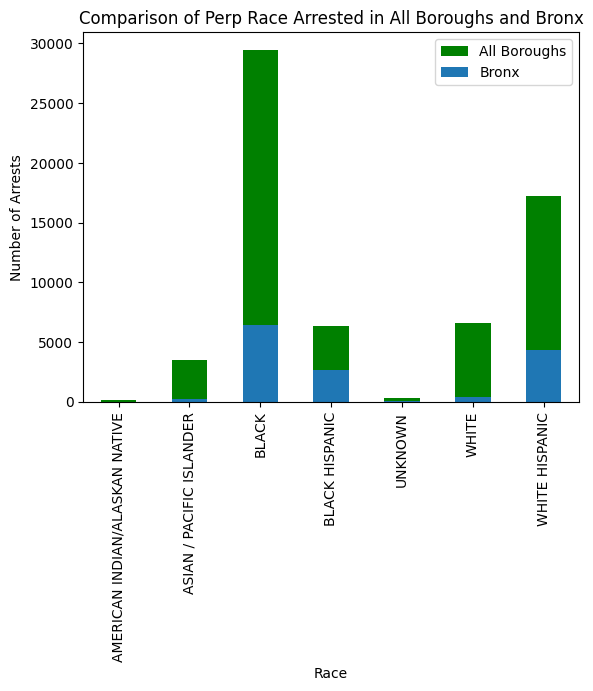

In [32]:
#compare perp_race in both dataframes
df_race = df.groupby('PERP_RACE').size()
my_df_race = my_df.groupby('PERP_RACE').size()

# Create a bar chart to compare the perp_race in both dataframes
df_race.plot(kind='bar', label='All Boroughs', color='green')
my_df_race.plot(kind='bar', label='Bronx')
plt.title('Comparison of Perp Race Arrested in All Boroughs and Bronx')
plt.xlabel('Race')
plt.ylabel('Number of Arrests')
plt.legend()
plt.show()

In conclusion, when comparing the Bronx to the NYC dataset regarding the arrest data, the most commited offense in the Bronx is Assault 3 & related offenses which amounts to about 25% of the whole data set. In the Bronx, most of the crimes are categorized as misdemeanor crimes, which accounts to about 24% of all misdemeanor crimes. The age group that commits the most crimes is between ages 25-44, the Bronx contributes to about 23% of that. In the entire dataframe, we also see the race who is arrested the most is black by a significant amount, but in the Bronx, it is between Black and White Hispanics.

We must take into consideration the Biases as well with the data, as this data comes from the NYPD and most policing is done in low-income and minority neighborhoods. We must also remember that the arrest may not lead to a conviction and it is only an accusation of a crime.